In [78]:
# Imports and settings

import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import statsmodels.api as sm

from common.styles import set_css_style, setup_matplotlib

# Jupyter configs 
%config InlineBackend.figure_format = 'retina'      # increases dpi on retina displays
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"              # to print more than one var in one cell without "print"

# Set Matplotlib style (has to go first to prevent overwriting)
setup_matplotlib('../styles_files/matplotlibrc.json')

# Set notebook CSS style
set_css_style('../styles_files/custom.css')

# OLS: digging in the residuals

## Who are the residuals

For each point labelled with $i$ in the data set, its **residual** is the difference between its actual (observed) value of the dependent variable $y_i$ and the predicted value $\hat y_i$ (the point on the fitting line). 

Residuals represent the variation (error) which is not explained by the model and the general assumption is that they are _normally distributed_ around a mean of $0$, because the model is expected to predict higher than the actual value or lower than the actual value with the same probability, or, to phrase it better, because we expect residuals to be pure noise and not display any pattern.

> TODO plot residuals against independent variable in order [1], to spot patterns

> TODO clarify the assumption is also that residuals as iid\

> TODO for full assumtions, Gauss-Markov theorem

In [93]:
# using a dataset from statsmodels 

dataset = sm.datasets.copper
data = dataset.load_pandas()
df = data.data
df.head()
df.corr()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0


,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
WORLDCONSUMPTION,1.000000,0.669867,0.977959,-0.189418,-0.221196,0.979820
COPPERPRICE,0.669867,1.000000,0.692203,0.028478,-0.017900,0.635785
INCOMEINDEX,0.977959,0.692203,1.000000,-0.275469,-0.235693,0.965898
ALUMPRICE,-0.189418,0.028478,-0.275469,1.000000,0.180706,-0.091590
INVENTORYINDEX,-0.221196,-0.017900,-0.235693,0.180706,1.000000,-0.272853
TIME,0.979820,0.635785,0.965898,-0.091590,-0.272853,1.000000


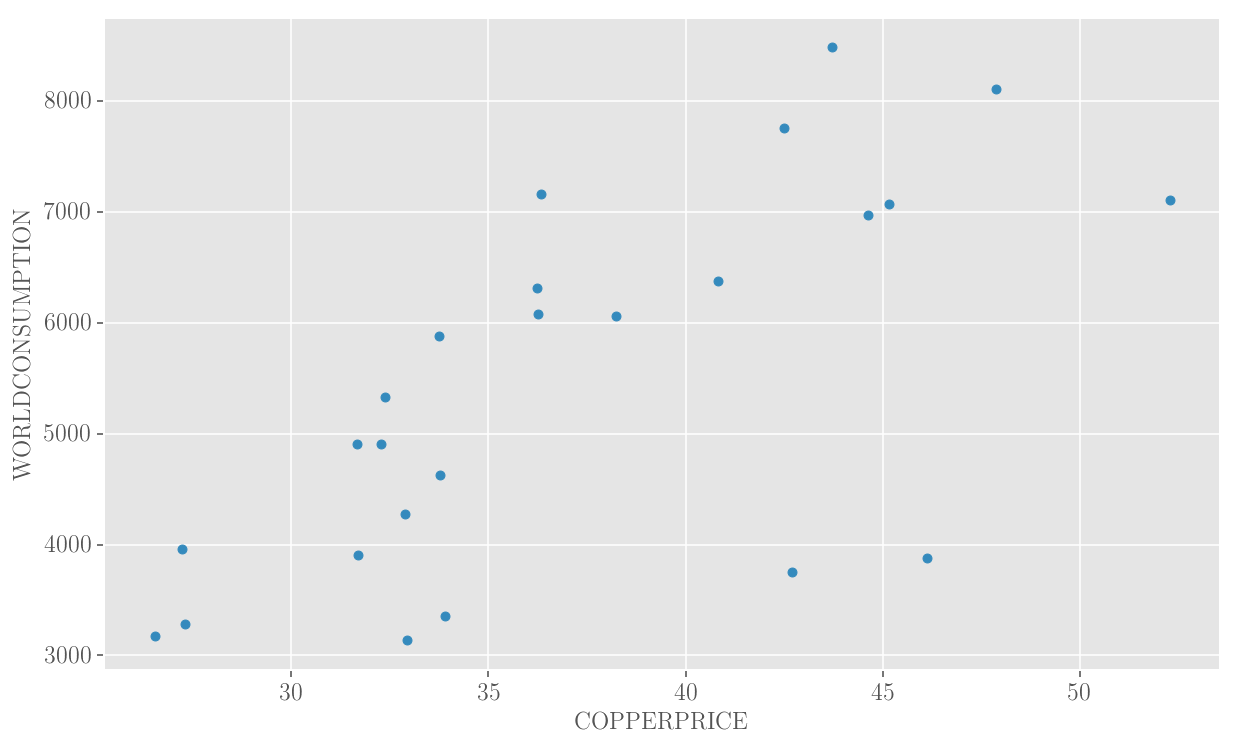

In [96]:
df.plot('COPPERPRICE', 'WORLDCONSUMPTION', kind='scatter')
plt.show();

In [94]:
# fit an OLS

mod = sm.OLS(data.endog, data.exog)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2209.
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           1.05e-26
Time:                        23:09:00   Log-Likelihood:                -172.62
No. Observations:                  25   AIC:                             355.2
Df Residuals:                      20   BIC:                             361.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
COPPERPRICE       14.2220     12.090      1.176      0.253     -10.998      39.442
INCOMEINDEX     1693.1662   1970.555      0.859      0.400   -2417.339    5803.671
ALUMPRICE        -60.6381     32.023     -1.894      0.073    -127.437       6.161
INVENTORYINDEX  2515.3749   1670.948      1.505      0.148    -970.162    6000.912
TIME             183.1930     36.879      4.967      0.000     106.264     260.122
==============================================================================
Omnibus:                        8.007   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.014
Skew:                          -0.936   Prob(JB):                       0.0494
Kurtosis:                       4.506   Cond. No.                     2.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

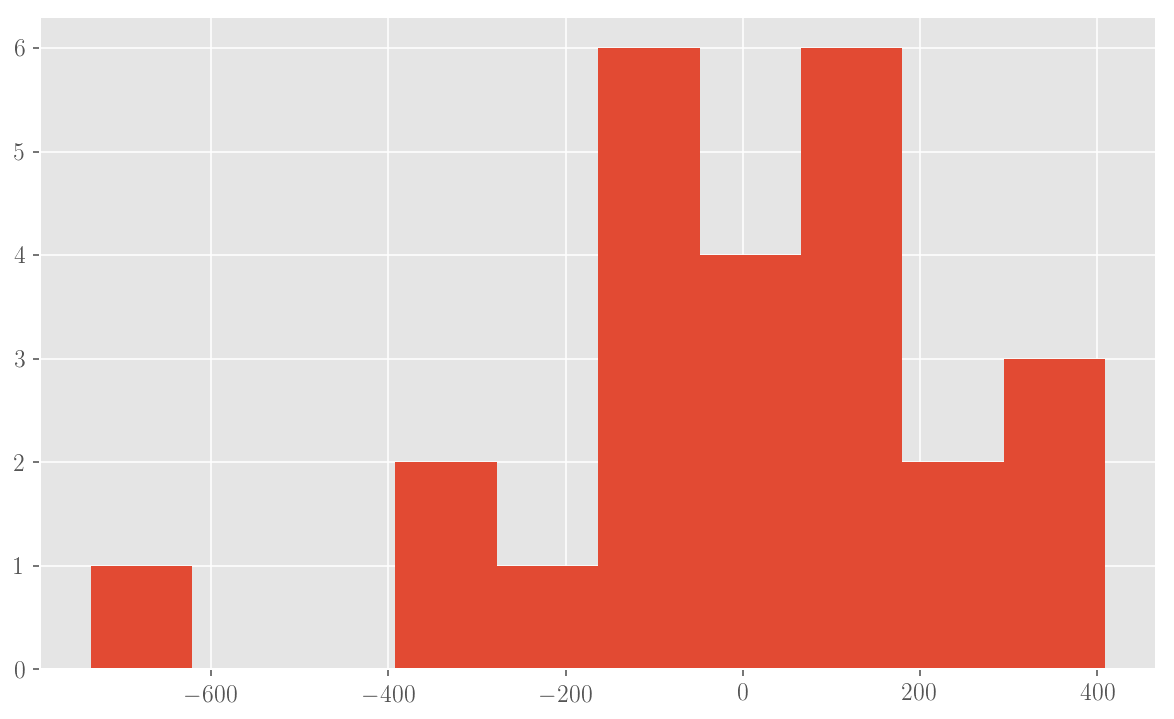

In [95]:
res.resid.hist()
plt.show();

### Residual plot

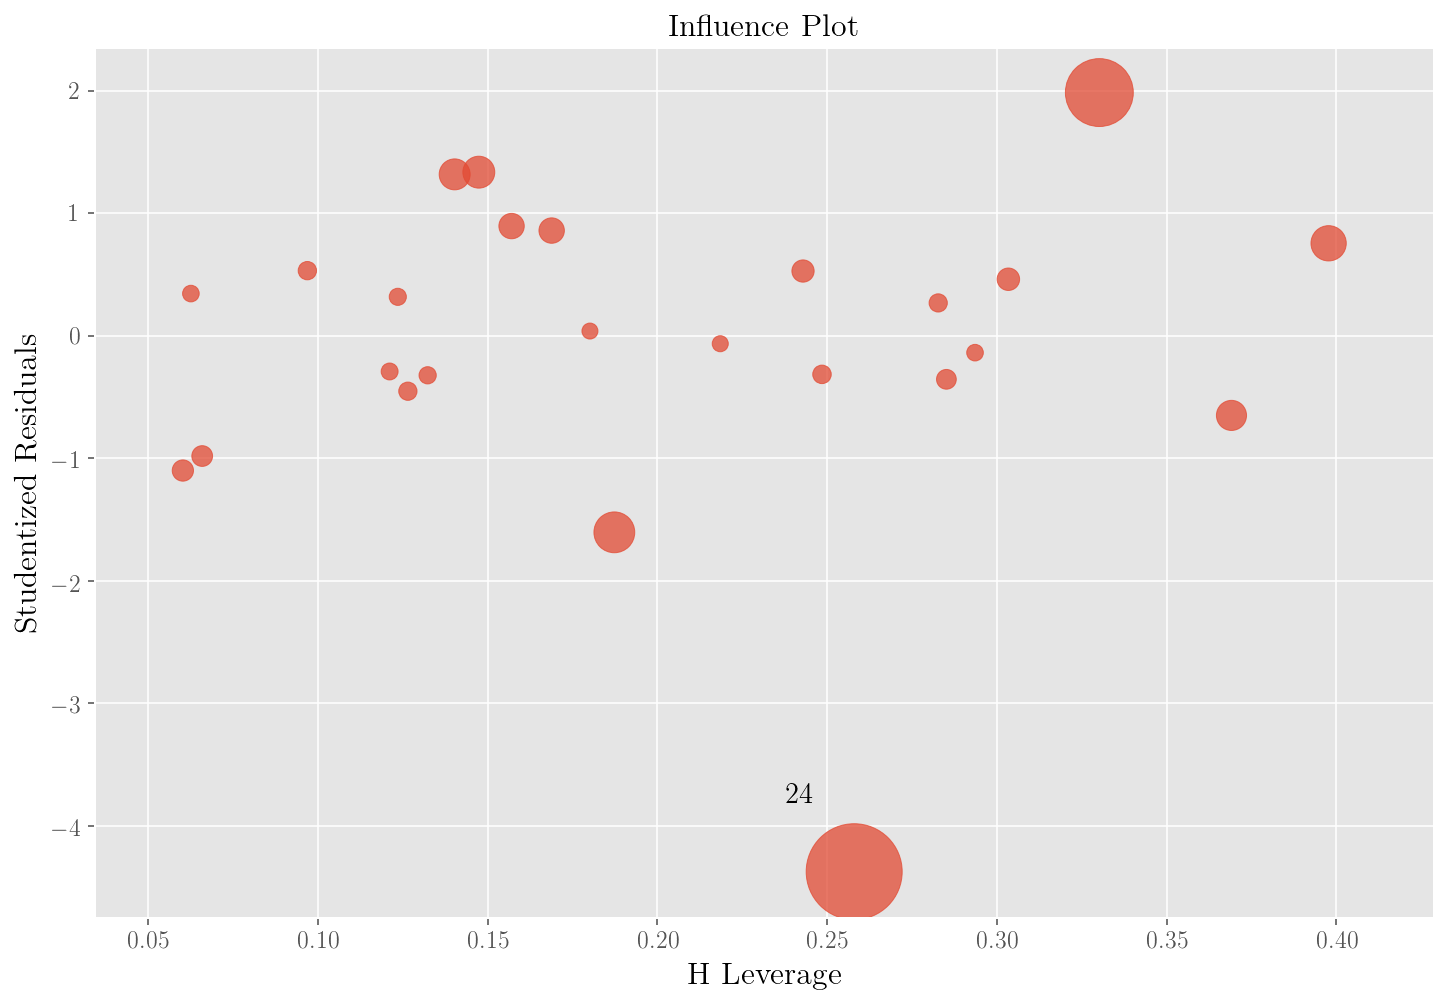

In [97]:
ig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(res, ax=ax, criterion="cooks")
plt.show()

### Regression plots

## References

1. [Plot of residuals of each ordered independent variable and normality hypothesis](http://www.qualitydigest.com/inside/quality-insider-article/should-residuals-be-normal.html)
2. 